In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/creditcard-sample10k.csv')

In [4]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [18]:
features_train = df.sample(frac=0.75, random_state=100)
features_test = df[~df.index.isin(features_train.index)]

ftrain_o = features_train
ftest_o = features_test

features_train = features_train.loc[:, ~features_train.columns.str.contains('^Unnamed')]
target_train = features_train['Class']
del features_train['Time']
del features_train['Class']

features_test = features_test.loc[:, ~features_test.columns.str.contains('^Unnamed')]
target_test = features_test['Class']
del features_test['Time']
del features_test['Class']

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=4, n_jobs=10)

In [20]:
model.fit(features_train, target_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

In [22]:
pred_train_prob = model.predict_proba(features_train)
pred_test_prob = model.predict_proba(features_test)

0    7471
1      29
Name: Class, dtype: int64
[0, 1]
[0, 1]


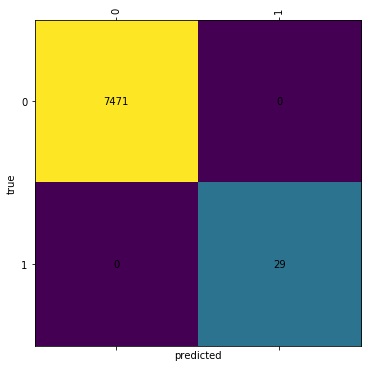

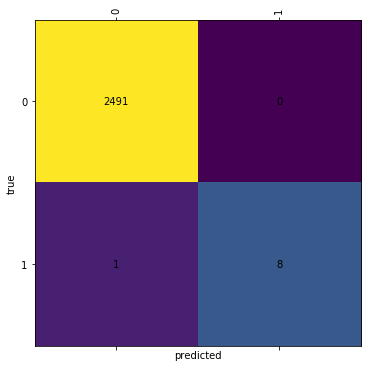

In [32]:
import matplotlib.pylab as plt
import numpy as np
import matplotlib.colors
from sklearn.metrics import precision_recall_curve,\
                            average_precision_score,\
                            roc_auc_score, roc_curve,\
                            confusion_matrix, classification_report

def plot_confusion_matrix(train_labels, train_pred):
    fig = plt.figure(figsize=(6,6))
    ax = plt.subplot()

    labels = list(train_labels['Class'].value_counts().index)
    print(labels)

    confusion = confusion_matrix(train_labels['Class'], train_pred, labels=labels)
    ax.matshow(np.log(confusion + 1.001))

    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))

    ax.set_xticklabels(labels, rotation=90);
    ax.set_yticklabels(labels);

    for i in range(len(labels)):
        for j in range(len(labels)):        
            ax.text(j, i, confusion[i,j], va='center', ha='center')

    plt.xlabel('predicted')    
    plt.ylabel('true')
    
    return fig

print(ftrain_o['Class'].value_counts())
_=plot_confusion_matrix(ftrain_o, model.predict(features_train))

_=plot_confusion_matrix(ftest_o, model.predict(features_test))

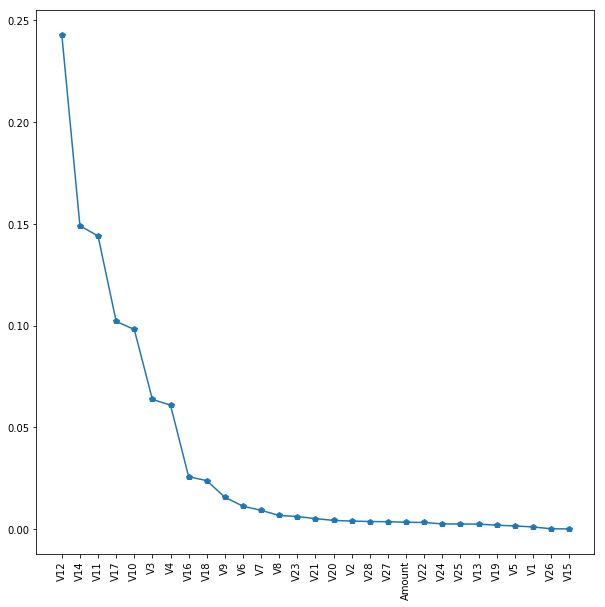

In [33]:
import operator
import matplotlib.pylab as plt

feat_imp = sorted(zip(features_train.columns, model.feature_importances_), key=operator.itemgetter(1), reverse=True)
plt.figure(figsize=(10,10))
plt.plot([i[0] for i in feat_imp], [i[1] for i in feat_imp], 'p-')
_ = plt.xticks(rotation=90)

In [41]:
from sklearn.externals import joblib

drop_time_class = ['Time','Class','V1','V2','V5','V6','V7','V8','V9','V13','V15','V16','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
drop_class=['Class']

features_train = ftrain_o
features_test = ftest_o

features_train = features_train.loc[:, ~features_train.columns.str.contains('^Unnamed')]
features_test = features_test.loc[:, ~features_test.columns.str.contains('^Unnamed')]
target_train = features_train['Class']
target_test = features_test['Class']
features_train = features_train.drop(drop_time_class, axis=1)
features_test = features_test.drop(drop_time_class, axis=1)

model = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=10, class_weight='balanced')
                               
model.fit(features_train, target_train.values.ravel())

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

pred_train_prob = model.predict_proba(features_train)
pred_test_prob = model.predict_proba(features_test)

print("Number of features")
print(len(model.feature_importances_))
  
#save mode in filesystem
joblib.dump(model, 'model.pkl') 

Number of features
8


['model.pkl']